In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('day6creditrisk.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [30]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [31]:
df = df.fillna(method = 'bfill')
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [33]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.780762,9589.371106,11.011071,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.131268,6322.086646,3.244322,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>, <Axes: >]],
      dtype=object)

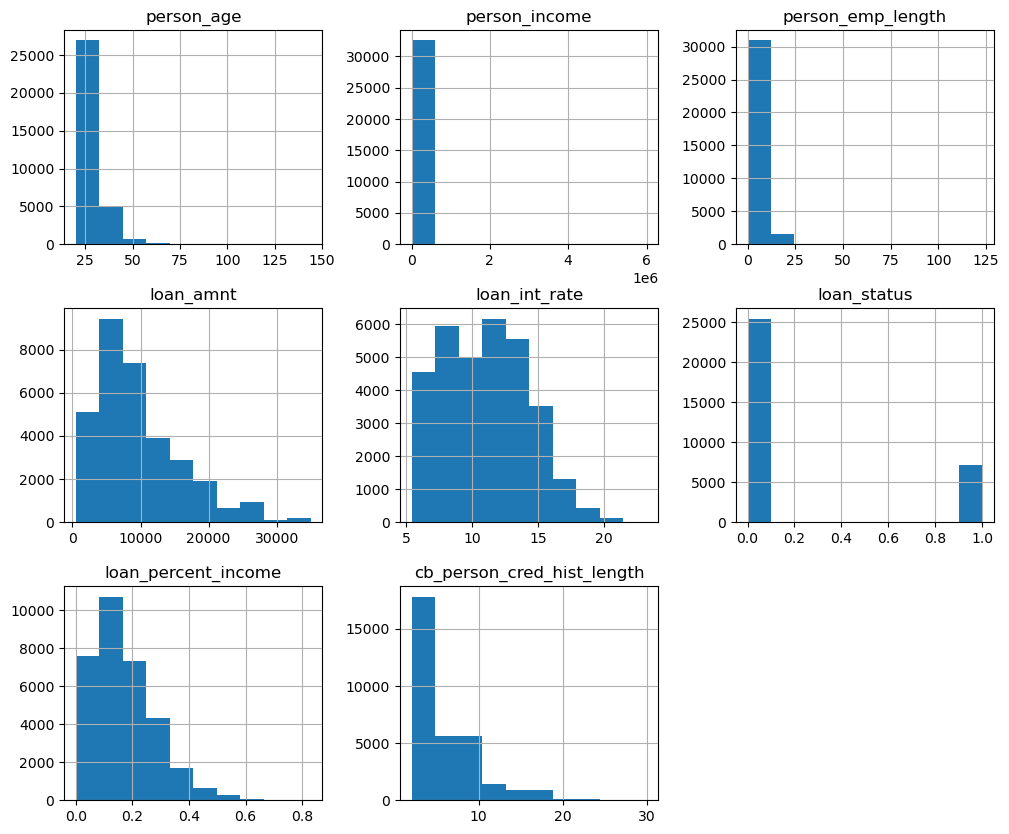

In [34]:
df.hist(figsize=(12,10))

<Axes: >

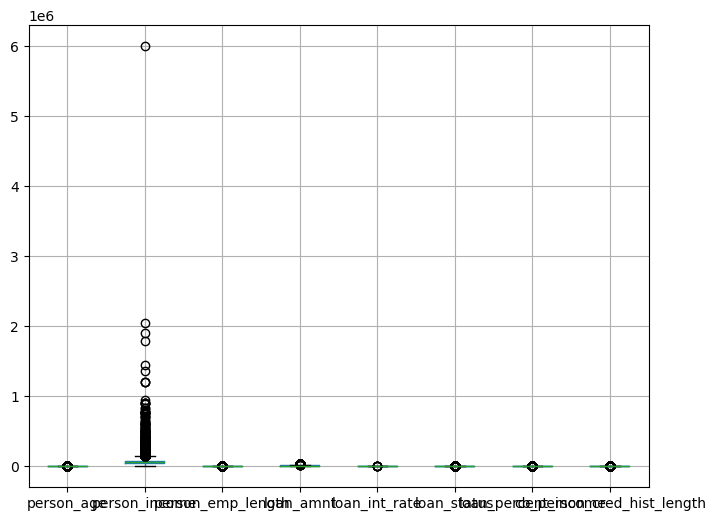

In [35]:
df.boxplot(figsize=(8,6))

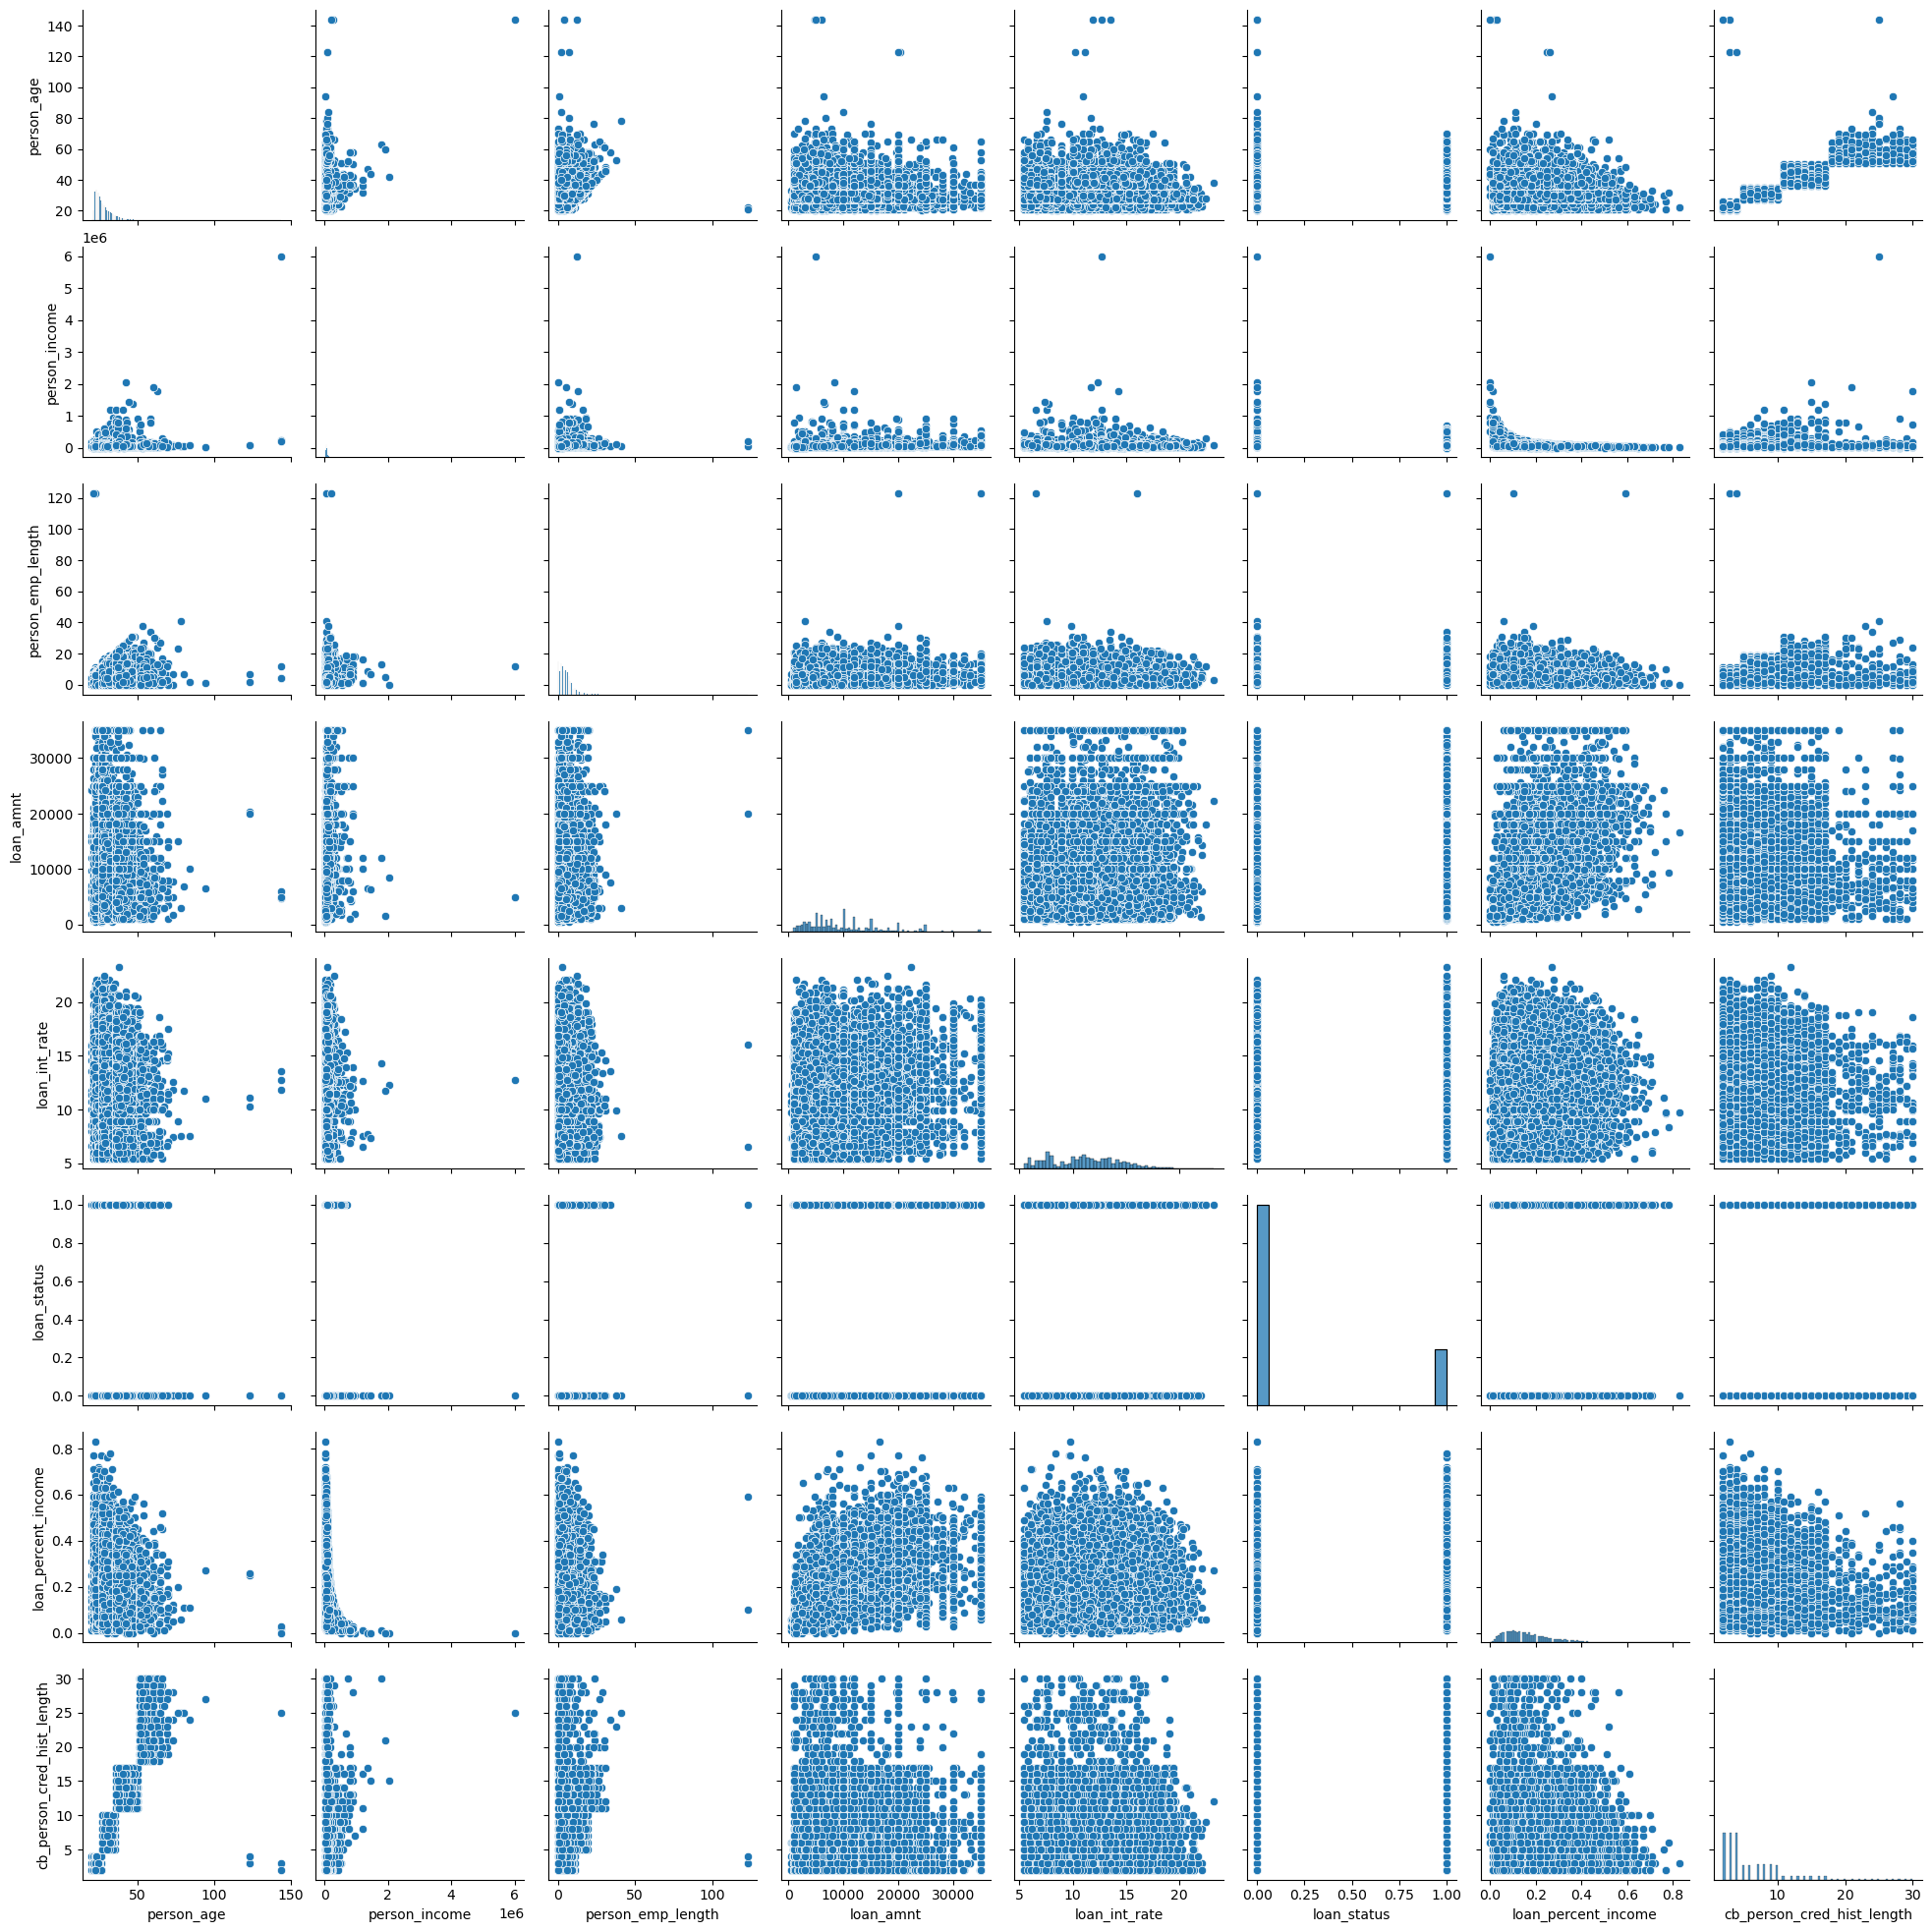

In [36]:
sns.pairplot(df)

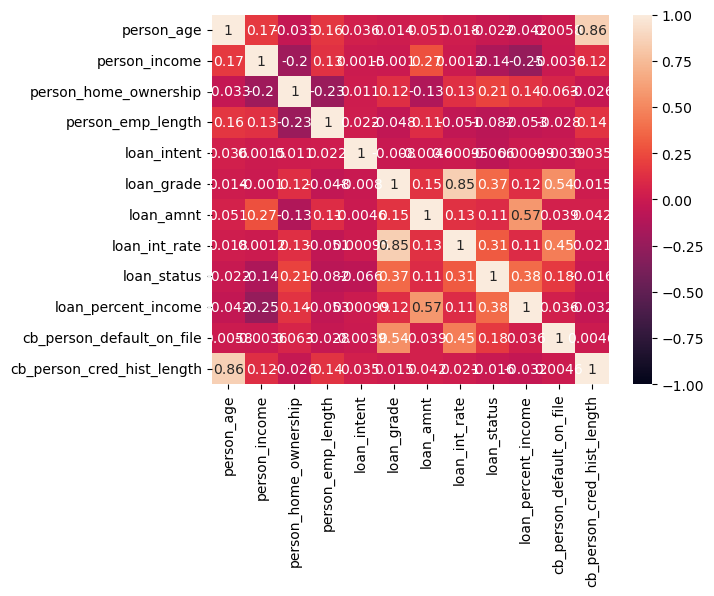

<Figure size 1600x2000 with 0 Axes>

In [44]:
sns.heatmap(df.corr(), annot = True, vmax=1, vmin=-1)
plt.figure(figsize=(16,20))
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['loan_grade'] = le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])
df.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3


# 2. Classification with Linear SVM:
a. Implement a linear SVM classifier using Python libraries like scikit-learn to predict credit risk based on applicant information.

b. Split the dataset into training and testing sets, and train the linear SVM model.

c. Evaluate the linear SVM model's performance using metrics such as accuracy, precision, recall, and F1-score.

In [46]:
# Implement a linear SVM classifier using Python libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [41]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [48]:
# Split the dataset into training, testing sets and train the linear SVM model

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)
print('**************************Training linear SVM model*********************************\n')
linear_svm_model=LinearSVC()
print('Training started....\n')
linear_svm_model.fit(xtrain, ytrain)
print('Training completed....\n')

print('Testing invoked....\n')
y_pred_linear = linear_svm_model.predict(xtest)
print('Predicted total is....\n', y_pred_linear)
print('\nTesting is also completed.....\n')

**************************Training linear SVM model*********************************

Training started....



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training completed....

Testing invoked....

Predicted total is....
 [18  4  4 ...  4  4 18]

Testing is also completed.....



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
# Evaluate the linear SVM model's performance using metrics such as accuracy, precision, recall, and F1-score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(ytest, y_pred_linear)
precision = precision_score(ytest, y_pred_linear, average='weighted')  
recall = recall_score(ytest, y_pred_linear, average='weighted')  
f1 = f1_score(ytest, y_pred_linear, average='weighted') 

print("***************SVM Model's Performance****************")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

***************SVM Model's Performance****************

Accuracy: 0.12444376246739297
Precision: 0.036379415961539964
Recall: 0.12444376246739297
F1 Score: 0.056239458051866566


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. Classification with Non-linear SVM:
a. Implement a non-linear SVM classifier using Python libraries, applying a kernel (e.g., Radial Basis Function or Polynomial kernel) to predict credit risk.

b. Split the dataset into training and testing sets, and train the non-linear SVM model.

c. Discuss the need for non-linear SVM and the choice of kernel.

d. Evaluate the non-linear SVM model's performance using classification metrics.

In [17]:
# Implement a non-linear SVM classifier using Python libraries

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the dataset into training, testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

# Training the model
print('**************************Training non-linear SVM model*********************************\n')
non_linear_svm_model = SVC(kernel='rbf')
print('Training started....\n')
non_linear_svm_model.fit(xtrain, ytrain)
print('Training completed....\n')

print('Testing invoked....\n')
y_pred_non_linear = non_linear_svm_model.predict(xtest)
print('Predicted total is....\n', np.unique(y_pred_non_linear))
print('\nTesting is also completed.....\n')

**************************Training non-linear SVM model*********************************

Training started....



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training completed....

Testing invoked....

Predicted total is....
 [ 2  3  4  5  6  8  9 10 13]

Testing is also completed.....



In [18]:
# Evaluate the non-linear SVM model's performance

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("***************Non-Linear SVM Model's Performance****************\n")
print('Mean Squared Error:\t',mean_squared_error(ytest,y_pred_non_linear))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,y_pred_non_linear)))
print()
print('R-Square value:\t',r2_score(ytest,y_pred_non_linear))

***************Non-Linear SVM Model's Performance****************

Mean Squared Error:	 25.299370876170016

RMSE:	 5.029847997322585

R-Square value:	 -0.5737159691322185


# 4. Hyperparameter Tuning:
a. Explain the role of hyperparameters in SVM models and suggest potential hyperparameters to optimize.

b. Conduct hyperparameter tuning for both the linear and non-linear SVM models and discuss the impact of different parameter values.

In [19]:
# Conduct hyperparameter tuning for both the linear and non-linear SVM models

print('*************Hyperparameters for linear SVM models***************\n')
print(linear_svm_model.get_params())
print()
print('*************Hyperparameters for non-linear SVM models***************\n')
print(non_linear_svm_model.get_params())

*************Hyperparameters for linear SVM models***************

{'C': 1.0, 'class_weight': None, 'dual': 'warn', 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}

*************Hyperparameters for non-linear SVM models***************

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# 5. Decision Boundary Visualization:
a. Visualize the decision boundaries of both the linear and non-linear SVM models. Discuss the differences in decision boundaries for linear and non-linear SVMs.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


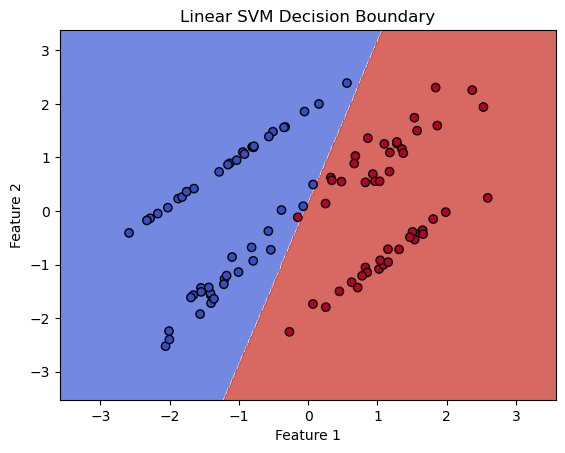

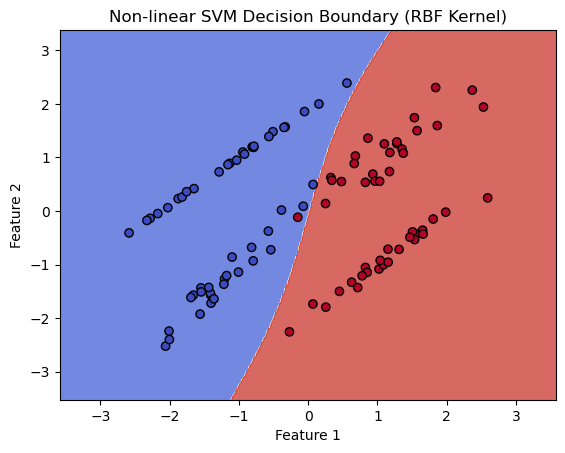

In [20]:
# Visualize the decision boundaries of both the linear and non-linear SVM models

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_classification

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Linear SVM
linear_svm_model = LinearSVC(C=1)
linear_svm_model.fit(X, y)

# Non-linear SVM with RBF kernel
non_linear_svm_model = SVC(C=1, kernel='rbf', gamma=0.1)
non_linear_svm_model.fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for both models
plot_decision_boundary(linear_svm_model, X, y, 'Linear SVM Decision Boundary')
plot_decision_boundary(non_linear_svm_model, X, y, 'Non-linear SVM Decision Boundary (RBF Kernel)')

# 6. Support Vectors:
a. Explain the concept of support vectors and their significance in SVM models.

b. Calculate the support vectors for both the linear and non-linear SVM models.

In [21]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
 
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
 
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
 
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

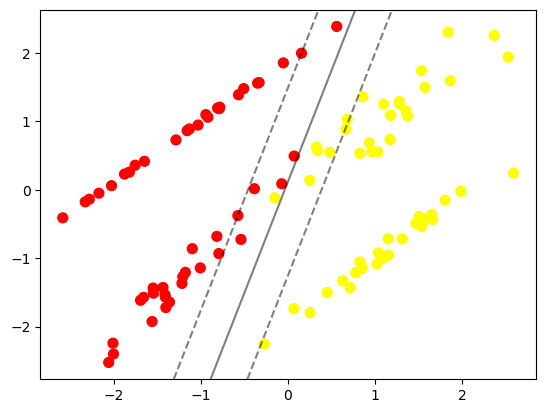

In [23]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [24]:
print('Linear model support vectors are:\n')
model.support_vectors_

Linear model support vectors are:



array([[ 0.55942643,  2.38869353],
       [ 0.07123641,  0.49429823],
       [-0.07133524,  0.08896214],
       [-0.38566776,  0.01722979],
       [-0.53963044, -0.72427983],
       [ 0.15513175,  1.99805321],
       [-0.57500215, -0.3751207 ],
       [ 0.480502  ,  0.54914434],
       [-0.15013844, -0.11708689],
       [ 0.25058844,  0.13979096],
       [ 0.32725188,  0.62453032],
       [ 0.68057323,  1.02703224],
       [ 0.34129395,  0.57304248]])

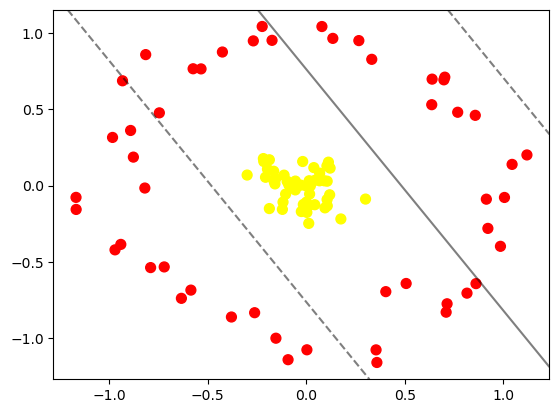

In [25]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='linear').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

In [26]:
non_linear_svm_model.fit(X, y)
non_linear_support_vectors = non_linear_svm_model.support_vectors_
print("Non-linear model support vectors are:\n")
print(non_linear_support_vectors)

Non-linear model support vectors are:

[[-2.2813861  -0.1368559 ]
 [ 0.480502    0.54914434]
 [-1.20757158 -1.26898369]
 [ 0.25415746 -1.79532002]
 [-1.17762637 -1.20592943]
 [ 0.93343952  0.68811892]
 [ 1.02255619 -1.08324727]
 [-0.81680628 -0.6795874 ]
 [-2.17105282 -0.04862909]
 [-0.15013844 -0.11708689]
 [-1.4117586  -1.5332749 ]
 [-2.58590856 -0.40925706]
 [-0.07133524  0.08896214]
 [ 0.6273745  -1.32933233]
 [ 1.65882246 -0.43131517]
 [ 1.2798899   1.25896077]
 [ 0.25058844  0.13979096]
 [-2.05832072 -2.52343407]
 [ 0.96423311  0.55600276]
 [ 0.32725188  0.62453032]
 [ 1.08266027 -0.98021491]
 [ 1.53703587 -0.53355799]
 [-1.64832073  0.4176729 ]
 [ 0.66530077  0.88629356]
 [-1.00634985 -1.14054824]
 [ 1.08659413 -1.00544254]
 [ 0.82584805  0.53479393]
 [ 0.34129395  0.57304248]
 [ 1.15199146 -0.71352532]
 [-1.36045573 -1.64060704]
 [-0.34898484  1.56010259]
 [ 1.17329352  0.73644435]
 [-1.03223274  0.94800532]
 [ 1.83991037  2.30450019]
 [-1.43483867 -1.42695838]
 [-1.54446032 -1

# 7. Model Comparison:
a. Compare the performance of the linear and non-linear SVM models in credit risk assessment.

b. Discuss the trade-offs and use cases for linear and non-linear SVMs in classification tasks.

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
linear_accuracy = accuracy_score(ytest, y_pred_linear)
linear_precision = precision_score(ytest, y_pred_linear, average='weighted')
linear_recall = recall_score(ytest, y_pred_linear, average='weighted')
linear_f1 = f1_score(ytest, y_pred_linear, average='weighted')
linear_conf_matrix = confusion_matrix(ytest, y_pred_linear) 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Performance metrics for linear SVM
linear_accuracy = accuracy_score(ytest, y_pred_linear)
linear_precision = precision_score(ytest, y_pred_linear, average='weighted')
linear_recall = recall_score(ytest, y_pred_linear, average='weighted')
linear_f1 = f1_score(ytest, y_pred_linear, average='weighted')
linear_conf_matrix = confusion_matrix(ytest, y_pred_linear)

# Performance metrics for non-linear SVM
non_linear_accuracy = accuracy_score(ytest, y_pred_non_linear)
non_linear_precision = precision_score(ytest, y_pred_non_linear, average='weighted')
non_linear_recall = recall_score(ytest, y_pred_non_linear, average='weighted')
non_linear_f1 = f1_score(ytest, y_pred_non_linear, average='weighted')
non_linear_conf_matrix = confusion_matrix(ytest, y_pred_non_linear)

# Display the results
print("******************Linear SVM Performance Metrics*********************\n")
print(f"Accuracy: {linear_accuracy:.4f}")
print(f"Precision: {linear_precision:.4f}")
print(f"Recall: {linear_recall:.4f}")
print(f"F1 Score: {linear_f1:.4f}")
print("Confusion Matrix:")
print(linear_conf_matrix)

print("\n******************Non-linear SVM Performance Metrics**********************\n")
print(f"Accuracy: {non_linear_accuracy:.4f}")
print(f"Precision: {non_linear_precision:.4f}")
print(f"Recall: {non_linear_recall:.4f}")
print(f"F1 Score: {non_linear_f1:.4f}")
print("Confusion Matrix:")
print(non_linear_conf_matrix)

******************Linear SVM Performance Metrics*********************

Accuracy: 0.1229
Precision: 0.0367
Recall: 0.1229
F1 Score: 0.0565
Confusion Matrix:
[[  0   0 810   0   0   0   0   0   0   0   0   0   0   0   0   0 287   0
    0   0   0   0   0 136   0   0   0   0]
 [  0   0 789   0   0   0   0   0   0   0   0   0   0   0   0   0 265   0
    0   0   0   0   0 116   0   0   0   0]
 [  0   0 799   0   0   0   0   0   0   0   0   0   0   0   0   0 283   0
    0   0   0   0   0 133   0   0   0   0]
 [  0   0 208   0   0   0   0   0   0   0   0   0   0   0   0   0 100   0
    0   0   0   0   0  49   0   0   0   0]
 [  0   0 218   0   0   0   0   0   0   0   0   0   0   0   0   0  90   0
    0   0   0   0   0  42   0   0   0   0]
 [  0   0 201   0   0   0   0   0   0   0   0   0   0   0   0   0 124   0
    0   0   0   0   0  48   0   0   0   0]
 [  0   0 239   0   0   0   0   0   0   0   0   0   0   0   0   0 104   0
    0   0   0   0   0  36   0   0   0   0]
 [  0   0 229   0   0   0

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
